In [38]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, optimizers

In [47]:
import pandas as pd

In [48]:
data = pd.read_excel("Data_Base.xlsx")

In [49]:
data.columns

Index(['C_m_delta_e', 'U_0', 'rho', 'st', 'c', 'I_y', 'C_z_delta_e', 'm', 'kp',
       'ki', 'kd'],
      dtype='object')

In [50]:
X = data[['C_m_delta_e', 'U_0', 'rho', 'st', 'c', 'I_y', 'C_z_delta_e', 'm',]]
y = data['kp']

In [51]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
Xnor = trans.fit_transform(X)

In [61]:
network = models.Sequential()
network.add(layers.Dense(8, activation='relu', input_shape=(8,)))
network.add(layers.Dense(8, activation='relu'))
network.add(layers.Dense(1))
#
# Configure the network with optimizer, loss function and accuracy
#
network.compile(optimizer=optimizers.Adam(lr=0.001),
                loss='mse',
                metrics=['mae'])

X_train, X_test, y_train, y_test = train_test_split(Xnor, y, test_size=0.3, random_state=42)

history = network.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=20)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
35/35 [==============================] - 1s 15ms/step - loss: 10.6423 - mae: 2.7180 - val_loss: 10.6736 - val_mae: 2.7032
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 8.6664 - mae: 2.2992 - val_loss: 8.8752 - val_mae: 2.3259
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 7.2013 - mae: 1.9408 - val_loss: 7.3694 - val_mae: 1.9879
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 5.9622 - mae: 1.7315 - val_loss: 6.0477 - val_mae: 1.8833
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 5.0146 - mae: 1.7207 - val_loss: 5.1325 - val_mae: 1.8675
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 4.4327 - mae: 1.7363 - val_loss: 4.6522 - val_mae: 1.8575
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 4.1791 - mae: 1.7549 - val_loss: 4.4211 - val_mae: 1.8460
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: 4.0881 

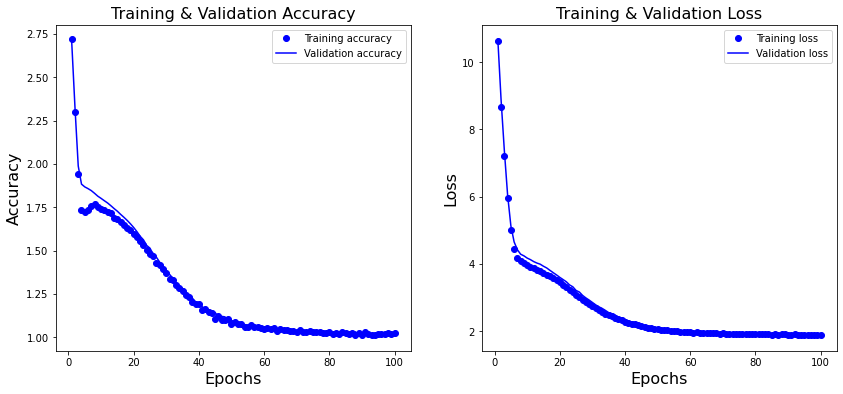

In [62]:
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()